<a href="https://colab.research.google.com/github/mrodrigues05/An-lise-de-startups-que-se-tornaram-Unic-rnios/blob/main/Projeto_Unicornios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de startups que se tornaram Unicórnios*



In [ ]:
#Importar as libs

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Avisos
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Ler os dados
Base_Dados = pd.read_csv('unicorns till sep 2022.csv')

#Verificar dimensão
Base_Dados.shape

(1186, 7)

In [ ]:
#Primeiros registros
Base_Dados.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [ ]:
#Columns
Base_Dados.columns

Index(['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City ',
       'Industry', 'Investors'],
      dtype='object')

In [ ]:
# Renomear colunas
Base_Dados.rename(columns={
    'Unnamed: 0': 'Id',
    'Company': 'Empresa',
    'Valuation ($B)': 'Valor ($)',
    'Date Joined': 'Data de adesão',
    'Country': 'Pais',
    'City': 'Cidade',
    'Industry': 'Setor',
    'Select Invertors': 'Investidores'
}, inplace=True)


In [ ]:
#Verificar o tipo da informação
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Empresa         1186 non-null   object
 1   Valor ($)       1186 non-null   object
 2   Data de adesão  1186 non-null   object
 3   Pais            1186 non-null   object
 4   City            1186 non-null   object
 5   Setor           1186 non-null   object
 6   Investors       1168 non-null   object
dtypes: object(7)
memory usage: 65.0+ KB


In [ ]:
Base_Dados.isnull().sum()


Empresa            0
Valor ($)          0
Data de adesão     0
Pais               0
City               0
Setor              0
Investors         18
dtype: int64

<Axes: title={'center': 'Analisando os campos nulos'}>

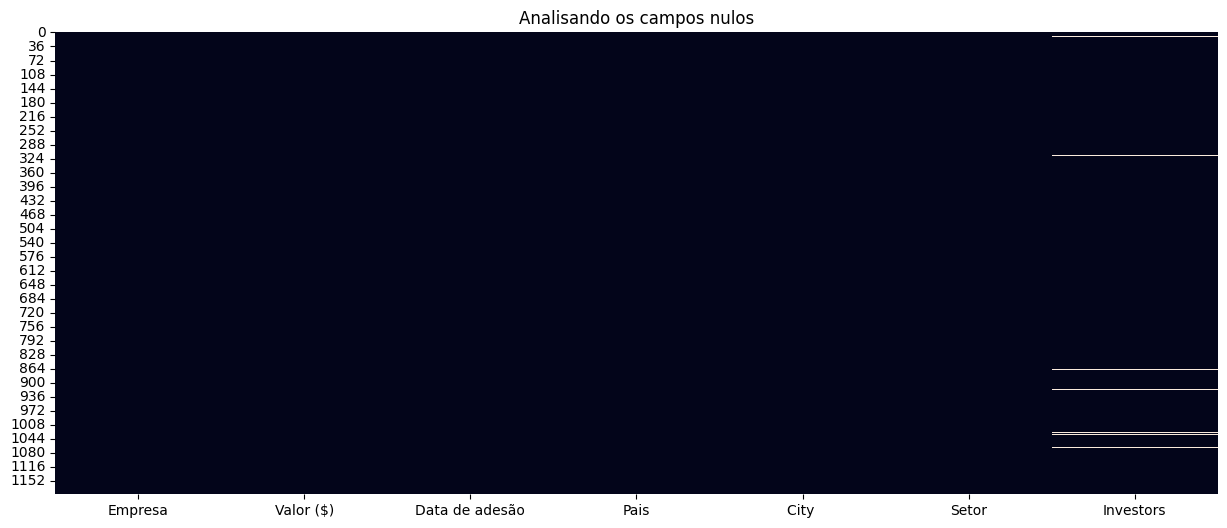

In [ ]:
#Gráfica
plt.figure(figsize=(15,6) )
plt.title('Analisando os campos nulos')
sns.heatmap( Base_Dados.isnull(), cbar=False)

In [ ]:
#Campos unicos
Base_Dados.nunique()

Empresa           1183
Valor ($)          222
Data de adesão     695
Pais                48
City               286
Setor               34
Investors         1152
dtype: int64

In [ ]:
Base_Dados['Setor'].unique()


array(['Artificial intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics',
       'Sequoia Capital, Thoma Bravo, Softbank', 'Edtech', 'Hardware',
       'Consumer & retail', 'Health', 'Auto & transportation',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Kuang-Chi',
       'Tiger Global Management, Tiger Brokers, DCM Ventures',
       'Jungle Ventures, Accel, Venture Highway',
       'Artificial Intelligence', 'GIC. Apis Partners, Insight Partners',
       'Vision Plus Capital, GSR Ventures, ZhenFund',
       'Hopu Investment Management, Boyu Capital, DC Thomson Ventures',
       'Internet', '500 Global, Rakuten Ventures, Golden Gate Ventures',
       'Sequoia Capital China, ING, Alibaba Entrepreneurs Fund',
       'Sequoia Capital China, Shunwei Capital Partners, Qualgro',
       'Dragonfly Captial, Qiming Venture Pa

In [ ]:
# Valore unicos - Ranl
Base_Dados['Setor'].value_counts()

Fintech                                                               239
Internet software & services                                          224
E-commerce & direct-to-consumer                                       103
Health                                                                 94
Artificial intelligence                                                74
Supply chain, logistics, & delivery                                    65
Other                                                                  65
Cybersecurity                                                          58
Data management & analytics                                            45
Auto & transportation                                                  40
Hardware                                                               38
Mobile & telecommunications                                            37
Edtech                                                                 32
Consumer & retail                     

In [ ]:
# Valore unicos - Ranl
Base_Dados['Setor'].value_counts( normalize=True)

Fintech                                                               0.201518
Internet software & services                                          0.188870
E-commerce & direct-to-consumer                                       0.086847
Health                                                                0.079258
Artificial intelligence                                               0.062395
Supply chain, logistics, & delivery                                   0.054806
Other                                                                 0.054806
Cybersecurity                                                         0.048904
Data management & analytics                                           0.037943
Auto & transportation                                                 0.033727
Hardware                                                              0.032040
Mobile & telecommunications                                           0.031197
Edtech                                              

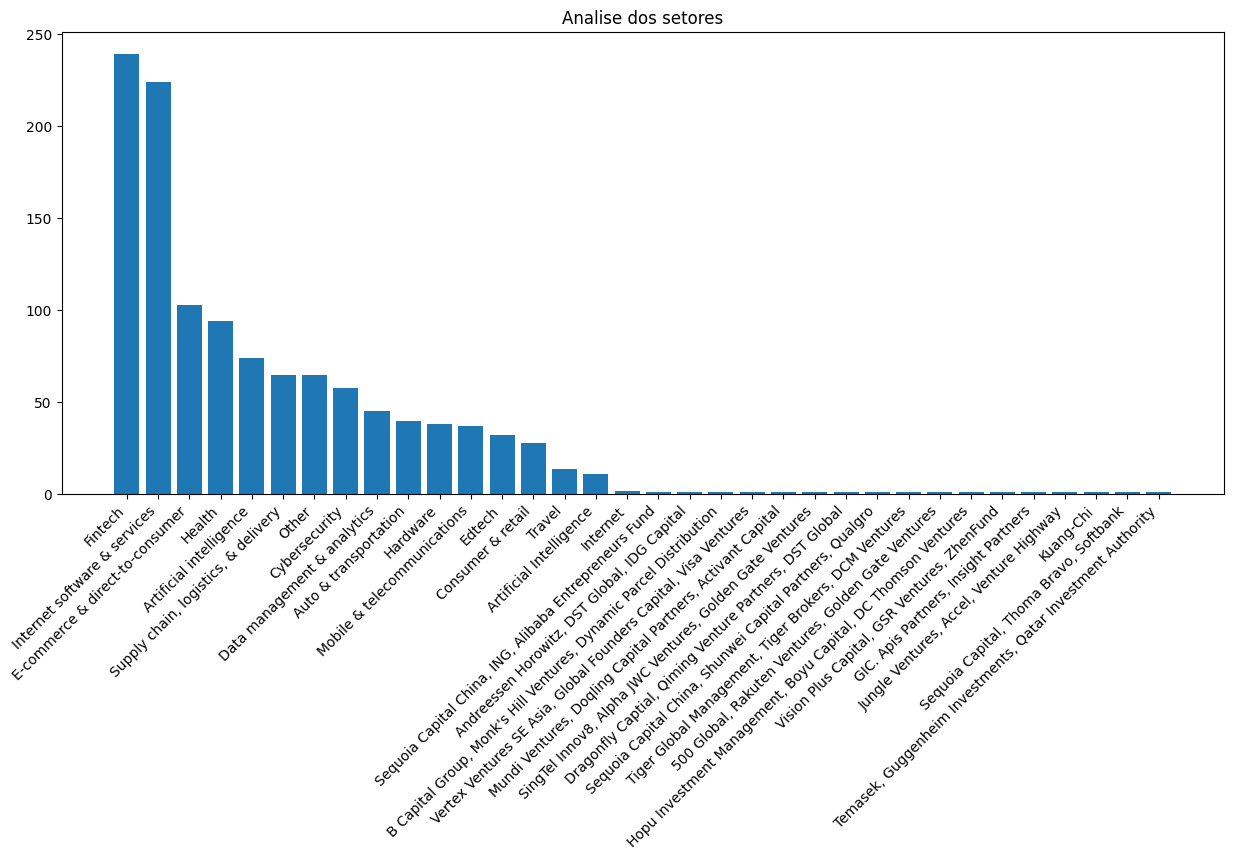

In [ ]:
plt.figure(figsize=(15,6) )
plt.title('Analise dos setores')
plt.bar( Base_Dados['Setor'].value_counts().index, Base_Dados['Setor'].value_counts() )
plt.xticks( rotation=45, ha='right' );

In [ ]:
Analise = round( Base_Dados['Pais'].value_counts(normalize=True) * 100, 1)

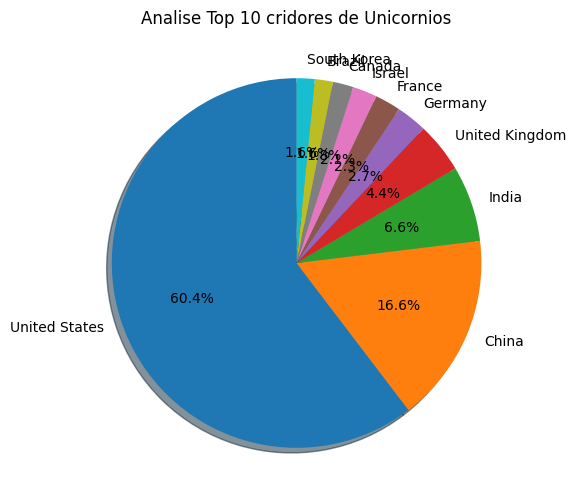

In [ ]:
plt.figure ( figsize=(15,6) )
plt.title('Analise Top 10 cridores de Unicornios')
plt.pie(
    Analise.head(10),
    labels = Analise.index[0:10],
    shadow=True,
    startangle=90,
    autopct='%1.1f%%'
);

In [ ]:
#Conversão para datas
Base_Dados['Data de adesão'] = pd.to_datetime( Base_Dados['Data de adesão'])

Base_Dados['Data de adesão'].head()

0   2017-04-07
1   2012-12-01
2   2018-07-03
3   2014-01-23
4   2018-01-08
Name: Data de adesão, dtype: datetime64[ns]

In [ ]:
#Extrair ano e mes
Base_Dados['Mes'] = pd.DatetimeIndex( Base_Dados['Data de adesão'] ).month
Base_Dados['Mes'] = pd.DatetimeIndex( Base_Dados['Data de adesão'] ).year

Base_Dados.head()

,Empresa,Valor ($),Data de adesão,Pais,City,Setor,Investors,Mes
0,ByteDance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,$127,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,$100,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",2018


In [ ]:
Base_Dados['Ano'] = Base_Dados['Data de adesão'].dt.year
Base_Dados['Mes'] = Base_Dados['Data de adesão'].dt.month

tabela_analitica = Base_Dados.groupby(['Pais', 'Ano', 'Mes' , 'Empresa']).size().reset_index(name='Contagem')
tabela_analitica = tabela_analitica.sort_values(['Pais', 'Ano', 'Mes'])

print(tabela_analitica)


               Pais   Ano  Mes            Empresa  Contagem
0         Argentina  2021    8               Uala         1
1         Australia  2018    1              Canva         1
2         Australia  2019    3          Airwallex         1
3         Australia  2021    5      SafetyCulture         1
4         Australia  2021    7        Culture Amp         1
...             ...   ...  ...                ...       ...
1181  United States  2022    8               Flow         1
1182  United States  2022    8  Incredible Health         1
1183  United States  2022    8  Orna Therapeutics         1
1184        Vietnam  2021   10          Sky Mavis         1
1185        Vietnam  2021   12               MoMo         1

[1186 rows x 5 columns]


In [ ]:
tabela_analitica.loc [
    tabela_analitica['Pais'] == 'Brazil'
]

,Pais,Ano,Mes,Empresa,Contagem
16,Brazil,2018,7,Movile,1
17,Brazil,2018,11,iFood,1
18,Brazil,2019,6,Loggi,1
19,Brazil,2019,9,QuintoAndar,1
20,Brazil,2019,10,EBANX,1
21,Brazil,2019,12,Wildlife Studios,1
22,Brazil,2020,1,Loft,1
23,Brazil,2020,12,C6 Bank,1
24,Brazil,2020,12,Creditas,1
25,Brazil,2021,1,MadeiraMadeira,1


In [ ]:
# Utiliza o método apply com uma função lambda para tratar cada valor individualmente
Base_Dados['Valor ($)'] = Base_Dados['Valor ($)'].apply(lambda Linha: pd.to_numeric(str(Linha).replace('$', ''), errors='coerce'))


# Exibe as primeiras linhas do DataFrame após a modificação
print(Base_Dados.head())

     Empresa  Valor ($) Data de adesão           Pais          City   \
0  ByteDance      140.0     2017-04-07          China        Beijing   
1     SpaceX      127.0     2012-12-01  United States      Hawthorne   
2      SHEIN      100.0     2018-07-03          China       Shenzhen   
3     Stripe       95.0     2014-01-23  United States  San Francisco   
4      Canva       40.0     2018-01-08      Australia    Surry Hills   

                             Setor  \
0          Artificial intelligence   
1                            Other   
2  E-commerce & direct-to-consumer   
3                          Fintech   
4     Internet software & services   

                                           Investors  Mes   Ano  
0  Sequoia Capital China, SIG Asia Investments, S...    4  2017  
1  Founders Fund, Draper Fisher Jurvetson, Rothen...   12  2012  
2  Tiger Global Management, Sequoia Capital China...    7  2018  
3        Khosla Ventures, LowercaseCapital, capitalG    1  2014  
4  Sequo

In [ ]:
#Tabela analitica
Analise_Pais = Base_Dados.groupby( by=['Pais'] ).sum()['Valor ($)'].reset_index()

Analise_Pais.head()

,Pais,Valor ($)
0,Argentina,2.45
1,Australia,54.40
2,Austria,7.61
3,Bahamas,32.00
4,Belgium,8.95


In [ ]:
Analise_Valor = Analise_Pais.sort_values('Valor ($)', ascending=False)

Analise_Valor.head()

,Pais,Valor ($)
46,United States,2069.89
9,China,678.59
45,United Kingdom,205.45
20,India,202.92
18,Germany,80.88


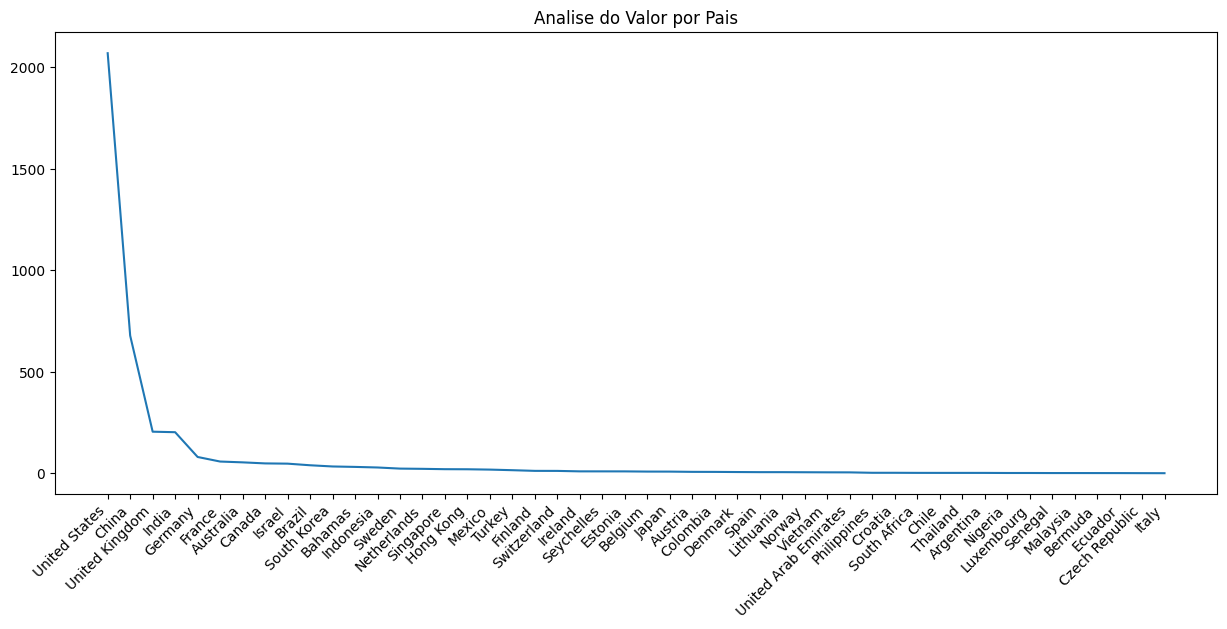

In [ ]:
plt.figure(figsize=(15,6) )
plt.plot( Analise_Valor['Pais'], Analise_Valor['Valor ($)'] )
plt.title('Analise do Valor por Pais')
plt.xticks( rotation=45, ha='right');